# Commodity Model Price Prediction(Big Data)

In [149]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
data = pd.read_csv('/kaggle/input/agriculture/agridata_csv_202110311352.csv')
data.head(10)

,commodity_name,state,district,market,min_price,max_price,modal_price,date
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22
5,Ajwan,Madhya Pradesh,Neemuch,Neemuch,80.00,132.00,95.00,2019-05-22
6,Ajwan,Rajasthan,Chittorgarh,Nimbahera,9.77,9.95,9.80,2019-05-22
7,Ajwan,Rajasthan,Chittorgarh,Pratapgarh,100.50,120.90,110.70,2019-05-22
8,Alasande+Gram,Karnataka,Bagalkot,Bagalakot,46.01,46.50,46.46,2019-05-22
9,Alasande+Gram,Karnataka,Bangalore,Bangalore,48.00,53.00,50.50,2019-05-22


In [151]:
data.shape

(836977, 8)

In [152]:
data.market.nunique()

2392

In [153]:
data.nunique()

commodity_name      249
state                30
district            487
market             2392
min_price         10028
max_price         12164
modal_price       12101
date                370
dtype: int64

In [154]:
data.state.unique()

array(['Gujarat', 'Madhya Pradesh', 'Rajasthan', 'Karnataka', 'Kerala',
       'Punjab', 'Uttar Pradesh', 'Chattisgarh', 'Haryana',
       'Himachal Pradesh', 'Maharashtra', 'NCT of Delhi', 'Odisha',
       'Uttrakhand', 'West Bengal', 'Assam', 'Manipur',
       'Jammu and Kashmir', 'Meghalaya', 'Nagaland', 'Tripura',
       'Telangana', 'Tamil Nadu', 'Andhra Pradesh', 'Pondicherry',
       'Jharkhand', 'Goa', 'Mizoram', 'Andaman and Nicobar', '1.50'],
      dtype=object)

In [155]:
data['date']

0          2019-05-22
1          2019-05-22
2          2019-05-22
3          2019-05-22
4          2019-05-22
             ...     
836972    06 Oct 2021
836973    06 Oct 2021
836974    06 Oct 2021
836975    06 Oct 2021
836976    06 Oct 2021
Name: date, Length: 836977, dtype: object

In [156]:
data['date'] = pd.to_datetime(data['date'],format="mixed",dayfirst=True)

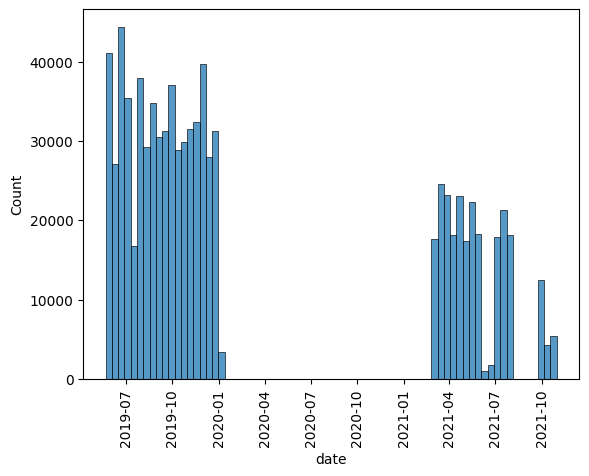

In [157]:
sns.histplot(x=data['date'])
plt.xticks(rotation=90);

In [158]:
num_cols = ['min_price','max_price', 'modal_price']

In [159]:
cat_cols = ['commodity_name', 'state', 'district', 'market']

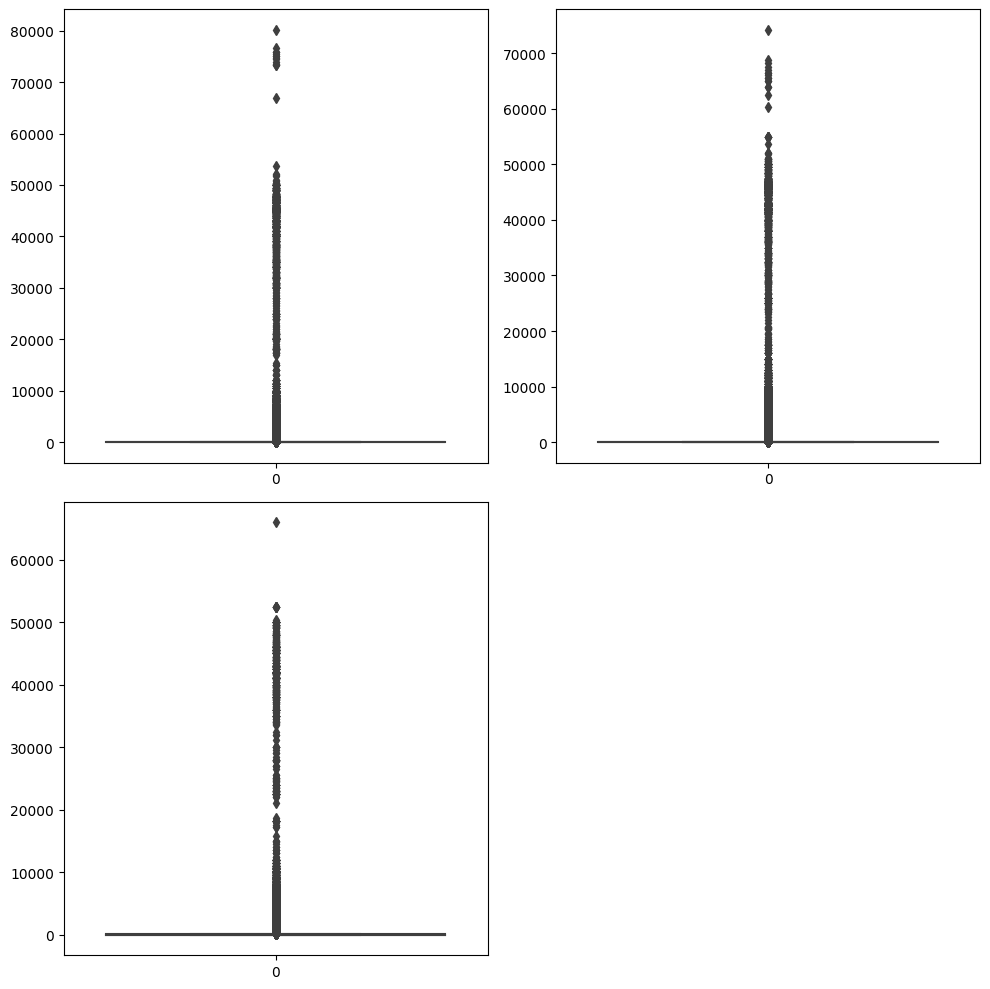

In [160]:
t = 1
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

In [161]:
for i in cat_cols:
    print(data[i].value_counts())
    print('---------------------------------------------')

commodity_name
Onion            44908
Tomato           42715
Wheat            41172
Potato           37810
Brinjal          33687
                 ...  
Lukad                2
Siddota              1
Sunhemp              1
its                  1
Almond(Badam)        1
Name: count, Length: 249, dtype: int64
---------------------------------------------
state
Uttar Pradesh          343165
Maharashtra             67357
Punjab                  67064
Gujarat                 60993
Kerala                  51492
Madhya Pradesh          39212
Himachal Pradesh        28425
Karnataka               26979
Rajasthan               26003
Haryana                 25773
West Bengal             21664
Uttrakhand              13976
Odisha                  13104
Tamil Nadu              11309
Tripura                 10019
Telangana                8040
Jammu and Kashmir        5583
Chattisgarh              4674
Andhra Pradesh           2941
Assam                    2535
NCT of Delhi             2368
Meghalaya  

In [162]:
data[data['state'] == '1.50']

,commodity_name,state,district,market,min_price,max_price,modal_price,date
834337,its,1.50,3000,5000,NaN,NaN,NaN,NaT


In [163]:
data[data['district'] =='3000']

,commodity_name,state,district,market,min_price,max_price,modal_price,date
834337,its,1.50,3000,5000,NaN,NaN,NaN,NaT


In [164]:
data.market.unique()

array(['Amreli', 'Dhanera', 'Jamnagar', ..., 'Hingoli(Kanegoan Naka)',
       'Jalgaon Jamod(Aasalgaon)', 'Nagarkurnool'], dtype=object)

In [165]:
data.isna().sum()

commodity_name    1
state             0
district          0
market            0
min_price         1
max_price         1
modal_price       1
date              1
dtype: int64

In [166]:
data.duplicated().sum()

120

In [167]:
data[data.commodity_name.isna()]

,commodity_name,state,district,market,min_price,max_price,modal_price,date
834417,NaN,Uttar Pradesh,Kanpur,Kanpur(Grain),6600.0,6800.0,6700.0,2021-10-12


In [168]:
data[data.min_price.isna()]

,commodity_name,state,district,market,min_price,max_price,modal_price,date
834337,its,1.50,3000,5000,NaN,NaN,NaN,NaT


In [169]:
data.drop(index=834337,inplace=True)

In [170]:
data.isna().sum()

commodity_name    1
state             0
district          0
market            0
min_price         0
max_price         0
modal_price       0
date              0
dtype: int64

In [171]:
data = data.dropna()

In [172]:
data.isna().sum()

commodity_name    0
state             0
district          0
market            0
min_price         0
max_price         0
modal_price       0
date              0
dtype: int64

In [173]:
data.shape

(836975, 8)

In [174]:
data.dtypes

commodity_name            object
state                     object
district                  object
market                    object
min_price                float64
max_price                float64
modal_price              float64
date              datetime64[ns]
dtype: object

In [175]:
data['DayOfWeek'] = data['date'].dt.dayofweek
data['Month'] = data['date'].dt.month
data['Quarter'] = data['date'].dt.quarter
data['Year'] = data['date'].dt.year

In [176]:
data['Month_max_price_mean'] = data.groupby(by='Month')['max_price'].transform('mean')
data['Month_min_price_mean'] = data.groupby(by='Month')['min_price'].transform('mean')

In [177]:
data['avg_price'] = (data['min_price'] + data['max_price']) / 2


In [178]:
data['state_avg_price'] = data.groupby(by='state')['avg_price'].transform('mean')
data['state_min_price'] = data.groupby(by='state')['avg_price'].transform('min')
data['state_max_price'] = data.groupby(by='state')['avg_price'].transform('max')
data['state_median_price'] = data.groupby(by='state')['avg_price'].transform('median')
data['state_std_price'] = data.groupby(by='state')['avg_price'].transform('std')

In [179]:
data['district_avg_price'] = data.groupby(by='district')['avg_price'].transform('mean')
data['district_min_price'] = data.groupby(by='district')['avg_price'].transform('min')
data['district_max_price'] = data.groupby(by='district')['avg_price'].transform('max')
data['district_median_price'] = data.groupby(by='district')['avg_price'].transform('median')
data['district_std_price'] = data.groupby(by='district')['avg_price'].transform('std')
data['market_size'] = data.groupby('market')['market'].transform('count')


In [216]:
data.nunique()

min_price                10028
max_price                12164
DayOfWeek                    7
Quarter                      4
Year                         2
Month_max_price_mean        10
Month_min_price_mean        10
avg_price                24740
state_avg_price             29
state_min_price             25
state_max_price             28
state_median_price          24
state_std_price             29
district_avg_price         486
district_min_price         189
district_max_price         341
district_median_price      285
market_size                802
commodity_encoded          248
district_label             486
market_label              2391
modal_price              12101
Month                       10
dtype: int64

In [180]:
data.head()

,commodity_name,state,district,market,min_price,max_price,modal_price,date,DayOfWeek,Month,...,state_min_price,state_max_price,state_median_price,state_std_price,district_avg_price,district_min_price,district_max_price,district_median_price,district_std_price,market_size
0,Ajwan,Gujarat,Amreli,Amreli,63.25,79.55,79.55,2019-05-22,2,5,...,1.035,11800.0,35.675,410.913745,81.118479,2.00,9977.5,42.5,484.281189,1617
1,Ajwan,Gujarat,Banaskanth,Dhanera,80.05,80.05,80.05,2019-05-22,2,5,...,1.035,11800.0,35.675,410.913745,72.313411,3.95,9005.0,45.1,338.674871,1038
2,Ajwan,Gujarat,Jamnagar,Jamnagar,90.00,155.00,122.50,2019-05-22,2,5,...,1.035,11800.0,35.675,410.913745,142.634353,6.00,11800.0,45.5,856.334950,729
3,Ajwan,Gujarat,Mehsana,Kadi,94.50,112.50,107.00,2019-05-22,2,5,...,1.035,11800.0,35.675,410.913745,73.581506,1.75,9937.5,40.0,500.459039,446
4,Ajwan,Gujarat,Mehsana,Unjha,21.25,148.50,99.75,2019-05-22,2,5,...,1.035,11800.0,35.675,410.913745,73.581506,1.75,9937.5,40.0,500.459039,1293


In [181]:
data['commodity_encoded'] = data.groupby('commodity_name')['avg_price'].transform('mean')

In [182]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['state_label'] = label_encoder.fit_transform(data['state'])
data['district_label'] = label_encoder.fit_transform(data['district'])
data['market_label'] = label_encoder.fit_transform(data['market'])

In [183]:
data.drop(columns=['commodity_name','state','district','market','date'],inplace=True)

In [184]:
data.head()

,min_price,max_price,modal_price,DayOfWeek,Month,Quarter,Year,Month_max_price_mean,Month_min_price_mean,avg_price,...,district_avg_price,district_min_price,district_max_price,district_median_price,district_std_price,market_size,commodity_encoded,state_label,district_label,market_label
0,63.25,79.55,79.55,2,5,2,2019,32.896709,28.153361,71.400,...,81.118479,2.00,9977.5,42.5,484.281189,1617,751.002245,5,15,78
1,80.05,80.05,80.05,2,5,2,2019,32.896709,28.153361,80.050,...,72.313411,3.95,9005.0,45.1,338.674871,1038,751.002245,5,39,593
2,90.00,155.00,122.50,2,5,2,2019,32.896709,28.153361,122.500,...,142.634353,6.00,11800.0,45.5,856.334950,729,751.002245,5,206,934
3,94.50,112.50,107.00,2,5,2,2019,32.896709,28.153361,103.500,...,73.581506,1.75,9937.5,40.0,500.459039,446,751.002245,5,304,999
4,21.25,148.50,99.75,2,5,2,2019,32.896709,28.153361,84.875,...,73.581506,1.75,9937.5,40.0,500.459039,1293,751.002245,5,304,2278


In [185]:
data.columns

Index(['min_price', 'max_price', 'modal_price', 'DayOfWeek', 'Month',
       'Quarter', 'Year', 'Month_max_price_mean', 'Month_min_price_mean',
       'avg_price', 'state_avg_price', 'state_min_price', 'state_max_price',
       'state_median_price', 'state_std_price', 'district_avg_price',
       'district_min_price', 'district_max_price', 'district_median_price',
       'district_std_price', 'market_size', 'commodity_encoded', 'state_label',
       'district_label', 'market_label'],
      dtype='object')

In [186]:
from scipy.stats import ttest_ind

cols = ['min_price', 'max_price', 'DayOfWeek',
       'Quarter', 'Year', 'Month_max_price_mean', 'Month_min_price_mean', 'avg_price',
       'state_avg_price', 'state_min_price', 'state_max_price',
       'state_median_price', 'state_std_price', 'district_avg_price',
       'district_min_price', 'district_max_price', 'district_median_price',
       'district_std_price', 'market_size']

li = []
for i in cols:
    pvalue = ttest_ind(data[i],data.modal_price)[1]
    
    if pvalue<0.05:
        li.append(i)
        
    else:
        pass

In [187]:
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

In [188]:
model = sfa.ols('modal_price~market_size+commodity_encoded+state_label+district_label+market_label+Month',data=data).fit()
a = anova_lm(model)
a

,df,sum_sq,mean_sq,F,PR(>F)
market_size,1.0,9.534967e+08,9.534967e+08,1118.384048,4.848942e-245
commodity_encoded,1.0,5.505943e+11,5.505943e+11,645808.081689,0.000000e+00
state_label,1.0,1.787038e+05,1.787038e+05,0.209607,6.470758e-01
district_label,1.0,1.590018e+07,1.590018e+07,18.649778,1.570836e-05
market_label,1.0,3.446849e+07,3.446849e+07,40.429099,2.039863e-10
Month,1.0,1.246610e+09,1.246610e+09,1462.185088,1.222022e-319
Residual,836968.0,7.135709e+11,8.525665e+05,NaN,NaN


In [189]:
a.iloc[:,-1]<0.05

market_size           True
commodity_encoded     True
state_label          False
district_label        True
market_label          True
Month                 True
Residual             False
Name: PR(>F), dtype: bool

In [190]:
li2 = ['commodity_encoded','district_label','market_label','modal_price','Month']
data.columns

Index(['min_price', 'max_price', 'modal_price', 'DayOfWeek', 'Month',
       'Quarter', 'Year', 'Month_max_price_mean', 'Month_min_price_mean',
       'avg_price', 'state_avg_price', 'state_min_price', 'state_max_price',
       'state_median_price', 'state_std_price', 'district_avg_price',
       'district_min_price', 'district_max_price', 'district_median_price',
       'district_std_price', 'market_size', 'commodity_encoded', 'state_label',
       'district_label', 'market_label'],
      dtype='object')

In [191]:
li

['min_price',
 'max_price',
 'DayOfWeek',
 'Quarter',
 'Year',
 'Month_max_price_mean',
 'Month_min_price_mean',
 'avg_price',
 'state_avg_price',
 'state_min_price',
 'state_max_price',
 'state_median_price',
 'state_std_price',
 'district_avg_price',
 'district_min_price',
 'district_max_price',
 'district_median_price',
 'market_size']

In [192]:
data[['min_price', 'max_price', 'modal_price', 'DayOfWeek', 'Month',
       'Quarter', 'Year', 'Month_max_price_mean', 'Month_min_price_mean', 'avg_price',
       'state_avg_price', 'state_min_price', 'state_max_price',
       'state_median_price','state_std_price', 'district_avg_price',
       'district_min_price', 'district_max_price', 'district_median_price','market_size', 'commodity_encoded',
       'district_label', 'market_label']]

,min_price,max_price,modal_price,DayOfWeek,Month,Quarter,Year,Month_max_price_mean,Month_min_price_mean,avg_price,...,state_median_price,state_std_price,district_avg_price,district_min_price,district_max_price,district_median_price,market_size,commodity_encoded,district_label,market_label
0,63.25,79.55,79.55,2,5,2,2019,32.896709,28.153361,71.400,...,35.675,410.913745,81.118479,2.000,9977.5,42.500,1617,751.002245,15,78
1,80.05,80.05,80.05,2,5,2,2019,32.896709,28.153361,80.050,...,35.675,410.913745,72.313411,3.950,9005.0,45.100,1038,751.002245,39,593
2,90.00,155.00,122.50,2,5,2,2019,32.896709,28.153361,122.500,...,35.675,410.913745,142.634353,6.000,11800.0,45.500,729,751.002245,206,934
3,94.50,112.50,107.00,2,5,2,2019,32.896709,28.153361,103.500,...,35.675,410.913745,73.581506,1.750,9937.5,40.000,446,751.002245,304,999
4,21.25,148.50,99.75,2,5,2,2019,32.896709,28.153361,84.875,...,35.675,410.913745,73.581506,1.750,9937.5,40.000,1293,751.002245,304,2278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836972,5100.00,5500.00,5300.00,2,10,4,2021,1216.475900,1072.432381,5300.000,...,35.675,410.913745,72.937591,4.625,5550.0,27.875,153,5845.592006,63,930
836973,3500.00,5500.00,5000.00,2,10,4,2021,1216.475900,1072.432381,4500.000,...,35.675,410.913745,78.916584,1.035,5762.5,37.550,1318,5845.592006,378,942
836974,5300.00,6225.00,5650.00,2,10,4,2021,1216.475900,1072.432381,5762.500,...,35.675,410.913745,78.916584,1.035,5762.5,37.550,1955,5845.592006,378,1832
836975,4750.00,5750.00,5250.00,2,10,4,2021,1216.475900,1072.432381,5250.000,...,35.675,410.913745,103.700627,2.400,5800.0,42.500,1065,5845.592006,219,2352


In [193]:
data=data.loc[:,li+li2]
data

,min_price,max_price,DayOfWeek,Quarter,Year,Month_max_price_mean,Month_min_price_mean,avg_price,state_avg_price,state_min_price,...,district_avg_price,district_min_price,district_max_price,district_median_price,market_size,commodity_encoded,district_label,market_label,modal_price,Month
0,63.25,79.55,2,2,2019,32.896709,28.153361,71.400,69.786212,1.035,...,81.118479,2.000,9977.5,42.500,1617,751.002245,15,78,79.55,5
1,80.05,80.05,2,2,2019,32.896709,28.153361,80.050,69.786212,1.035,...,72.313411,3.950,9005.0,45.100,1038,751.002245,39,593,80.05,5
2,90.00,155.00,2,2,2019,32.896709,28.153361,122.500,69.786212,1.035,...,142.634353,6.000,11800.0,45.500,729,751.002245,206,934,122.50,5
3,94.50,112.50,2,2,2019,32.896709,28.153361,103.500,69.786212,1.035,...,73.581506,1.750,9937.5,40.000,446,751.002245,304,999,107.00,5
4,21.25,148.50,2,2,2019,32.896709,28.153361,84.875,69.786212,1.035,...,73.581506,1.750,9937.5,40.000,1293,751.002245,304,2278,99.75,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836972,5100.00,5500.00,2,4,2021,1216.475900,1072.432381,5300.000,69.786212,1.035,...,72.937591,4.625,5550.0,27.875,153,5845.592006,63,930,5300.00,10
836973,3500.00,5500.00,2,4,2021,1216.475900,1072.432381,4500.000,69.786212,1.035,...,78.916584,1.035,5762.5,37.550,1318,5845.592006,378,942,5000.00,10
836974,5300.00,6225.00,2,4,2021,1216.475900,1072.432381,5762.500,69.786212,1.035,...,78.916584,1.035,5762.5,37.550,1955,5845.592006,378,1832,5650.00,10
836975,4750.00,5750.00,2,4,2021,1216.475900,1072.432381,5250.000,69.786212,1.035,...,103.700627,2.400,5800.0,42.500,1065,5845.592006,219,2352,5250.00,10


In [194]:
num = ['min_price', 'max_price','Month_max_price_mean', 'Month_min_price_mean',
       'avg_price', 'state_avg_price',
       'state_min_price', 'state_max_price', 'state_median_price',
       'state_std_price', 'district_avg_price', 'district_min_price',
       'district_max_price', 'district_median_price', 'market_size','modal_price']

cat = [ 'DayOfWeek', 'Month', 'Quarter', 'Year','commodity_encoded', 'district_label', 'market_label']

In [195]:
data[cat]

,DayOfWeek,Month,Quarter,Year,commodity_encoded,district_label,market_label
0,2,5,2,2019,751.002245,15,78
1,2,5,2,2019,751.002245,39,593
2,2,5,2,2019,751.002245,206,934
3,2,5,2,2019,751.002245,304,999
4,2,5,2,2019,751.002245,304,2278
...,...,...,...,...,...,...,...
836972,2,10,4,2021,5845.592006,63,930
836973,2,10,4,2021,5845.592006,378,942
836974,2,10,4,2021,5845.592006,378,1832
836975,2,10,4,2021,5845.592006,219,2352


In [196]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
data_sc = rb.fit_transform(data[num])
data_sc = pd.DataFrame(data_sc,columns = num)
data_sc

,min_price,max_price,Month_max_price_mean,Month_min_price_mean,avg_price,state_avg_price,state_min_price,state_max_price,state_median_price,state_std_price,district_avg_price,district_min_price,district_max_price,district_median_price,market_size,modal_price
0,1.696078,1.849153,-1.012976,-0.592464,1.811111,-1.000000,1.035,0.415525,3.004695,-1.240027,0.022652,-0.072464,1.545556,2.436775,0.216929,2.115242
1,2.354902,1.866102,-1.012976,-0.592464,2.131481,-1.000000,1.035,0.415525,3.004695,-1.240027,-0.135417,0.492754,1.113333,2.746206,-0.076533,2.133829
2,2.745098,4.406780,-1.012976,-0.592464,3.703704,-1.000000,1.035,0.415525,3.004695,-1.240027,1.126991,1.086957,2.355556,2.793811,-0.233147,3.711896
3,2.921569,2.966102,-1.012976,-0.592464,3.000000,-1.000000,1.035,0.415525,3.004695,-1.240027,-0.112652,-0.144928,1.527778,2.139244,-0.376584,3.135688
4,0.049020,4.186441,-1.012976,-0.592464,2.310185,-1.000000,1.035,0.415525,3.004695,-1.240027,-0.112652,-0.144928,1.527778,2.139244,0.052712,2.866171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836970,199.215686,185.593220,499.358784,523.063464,195.462963,-1.000000,1.035,0.415525,3.004695,-1.240027,-0.124212,0.688406,-0.422222,0.696221,-0.525089,196.184015
836971,136.470588,185.593220,499.358784,523.063464,165.833333,-1.000000,1.035,0.415525,3.004695,-1.240027,-0.016877,-0.352174,-0.327778,1.847664,0.065383,185.031599
836972,207.058824,210.169492,499.358784,523.063464,212.592593,-1.000000,1.035,0.415525,3.004695,-1.240027,-0.016877,-0.352174,-0.327778,1.847664,0.388241,209.195167
836973,185.490196,194.067797,499.358784,523.063464,193.611111,-1.000000,1.035,0.415525,3.004695,-1.240027,0.428049,0.043478,-0.311111,2.436775,-0.062848,194.325279


In [197]:
data.reset_index(drop=True, inplace=True)
data_sc.reset_index(drop=True, inplace=True)
data_scale = pd.concat([data[['DayOfWeek', 'Month', 'Quarter', 'Year','commodity_encoded', 'district_label', 'market_label']], data_sc], axis=1)


In [198]:
data_scale.shape

(836975, 23)

In [199]:
x= data_scale.drop(columns='modal_price')
y = data_scale['modal_price']

from sklearn.model_selection import train_test_split

trainx,testx,trainy,testy = train_test_split(x,y,train_size=0.70,random_state=20)

trainx.shape,trainy.shape,testx.shape,testy.shape,data.shape,data_scale.shape

((585882, 22), (585882,), (251093, 22), (251093,), (836975, 23), (836975, 23))

In [202]:
import statsmodels.api as sma
trainx_c = sma.add_constant(trainx)
model = sma.OLS(trainy,trainx_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            modal_price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                 5.539e+04
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:35:25   Log-Likelihood:            -2.7531e+06
No. Observations:              585882   AIC:                         5.506e+06
Df Residuals:                  585860   BIC:                         5.507e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2917.7036    105.144    -27.750      0.000   -3123.782   -2711.625
DayOfWeek                 0.0510      0.020      2.556      0.011       0.012       0.090
Month                     0.1971      0.060      3.269      0.001       0.079       0.315
Quarter                  -0.1359      0.155     -0.875      0.382      -0.440       0.169
Year                      1.4448      0.052     27.759      0.000       1.343       1.547
commodity_encoded        -0.0011   6.66e-05    -16.472      0.000      -0.001      -0.001
district_label            0.0004      0.000      1.454      0.146      -0.000       0.001
market_label             -0.0002   5.64e-05     -4.022      0.000      -0.000      -0.000
min_price                -0.9085      0.003   -312.705      0.000      -0.914      -0.903
max_price                 1.3565      0.003    458.899      0.000       1.351       1.362
Month_max_price_mean      2.7317      0.376      7.272      0.000       1.995       3.468
Month_min_price_mean     -2.6017      0.359     -7.254      0.000      -3.305      -1.899
avg_price                 0.3120      0.001    508.086      0.000       0.311       0.313
state_avg_price          -0.7023      0.025    -27.759      0.000      -0.752      -0.653
state_min_price           0.0784      0.038      2.085      0.037       0.005       0.152
state_max_price          -0.4957      0.025    -19.970      0.000      -0.544      -0.447
state_median_price        0.1230      0.004     30.436      0.000       0.115       0.131
state_std_price           1.0191      0.037     27.762      0.000       0.947       1.091
district_avg_price       -0.7003      0.004   -175.494      0.000      -0.708      -0.693
district_min_price        0.0204      0.003      7.713      0.000       0.015       0.026
district_max_price        0.6105      0.012     49.166      0.000       0.586       0.635
district_median_price     0.0037      0.002      2.113      0.035       0.000       0.007
market_size              -0.5064      0.056     -9.015      0.000      -0.616      -0.396
==============================================================================
Omnibus:                   565503.936   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      21001493236.797
Skew:                          -2.933   Prob(JB):                         0.00
Kurtosis:                     930.506   Cond. No.                     8.10e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.07e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

x= data.drop(columns='modal_price')
y = data['modal_price']

from sklearn.model_selection import train_test_split

trainx,testx,trainy,testy = train_test_split(x,y,train_size=0.70,random_state=20)

trainx.shape,trainy.shape,testx.shape,testy.shape,data.shape

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

In [204]:
# base model
def base_models():
    models = dict()
    models['LR'] = LinearRegression()
    models['DTREE'] = DecisionTreeRegressor()
    models['RF'] = RandomForestRegressor()
    models['GBM'] = GradientBoostingRegressor()
    models['XGB'] = XGBRegressor()
    models['ADA'] = AdaBoostRegressor()
    return models

In [205]:
from sklearn.model_selection import KFold,cross_val_score

def eval_models(model):
    cv = KFold(n_splits=5,shuffle=True,random_state=1001)
    scores = cross_val_score(estimator=model,X =x,y = y,cv=cv,scoring='r2',
                            n_jobs=-1)
    return scores

###### lets use the functions to calculate the scores........
import numpy as np
models = base_models()

result , names = list() , list()

for name , mymodel in models.items():
    finalscore = eval_models(mymodel)
    result.append(finalscore)
    names.append(name)
    print(name,np.mean((result)))

In [206]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [207]:
def model_validation(model,trainx,trainy,testx,testy):
    m = model
    m.fit(trainx,trainy)
    pred = m.predict(testx)
    print('MSE',mean_squared_error(testy,pred))
    print('RMSE',np.sqrt(mean_squared_error(testy,pred)))
    print('MAE',mean_absolute_error(testy,pred))
    print('MAPE',mean_absolute_percentage_error(testy,pred))
    r2 = r2_score(testy,pred)
    print('R Squared:',r2)

### Random Forest 

In [208]:
model_validation(RandomForestRegressor(max_depth=6,n_estimators=300,warm_start=True,n_jobs=-1),trainx,trainy,testx,testy)

MSE 114.2537592824835
RMSE 10.688955013586853
MAE 0.41975710026845575
MAPE 16334334258.424595
R Squared: 0.9442244865396253


In [209]:
model_validation(RandomForestRegressor(max_depth=6,n_estimators=300,warm_start=True,n_jobs=-1),trainx,trainy,trainx,trainy)

MSE 51.99987366393992
RMSE 7.211093791092994
MAE 0.3754569973624457
MAPE 17432419926.077103
R Squared: 0.975346954426942


### Decision Tree

In [210]:
model_validation(model=DecisionTreeRegressor(max_depth=5),trainx=trainx,trainy=trainy,
                testx=testx,testy=testy)

MSE 212.56327183836183
RMSE 14.579549781744353
MAE 0.7000568514022606
MAPE 44689292135.039085
R Squared: 0.8962325116997749


In [211]:
model_validation(model=DecisionTreeRegressor(max_depth=5),trainx=trainx,trainy=trainy,
                testx=trainx,testy=trainy)

MSE 166.05582790341347
RMSE 12.88626508742597
MAE 0.6743928678052213
MAPE 42509447591.950356
R Squared: 0.9212732338653042


### Adaboost

In [212]:
model_validation(model=AdaBoostRegressor(n_estimators=150
                                        ),trainx=trainx,trainy=trainy,
                testx=testx,testy=testy)

MSE 462.1161959317089
RMSE 21.496888052267213
MAE 1.887793820587042
MAPE 253582514902.46982
R Squared: 0.7744077020457586


In [213]:
model_validation(model=AdaBoostRegressor(n_estimators=150
                                        ),trainx=trainx,trainy=trainy,
                testx=trainx,testy=trainy)

MSE 338.25717521019465
RMSE 18.391769224579637
MAE 1.6925259319026342
MAPE 242138708785.3319
R Squared: 0.8396328881534642


### XGB

In [214]:
from xgboost import XGBRegressor
model_validation(model=XGBRegressor(max_depth=5,n_estimator=150),trainx=trainx,trainy=trainy,
                testx=testx,testy=testy)

MSE 505.93470833609643
RMSE 22.492992427333817
MAE 0.8600960475290875
MAPE 30626664637.226757
R Squared: 0.7530167207443739


In [215]:
model_validation(model=XGBRegressor(max_depth=5,n_estimator=150),trainx=trainx,trainy=trainy,
                testx=trainx,testy=trainy)

MSE 359.4748512565818
RMSE 18.95982202597329
MAE 0.7321961162981896
MAPE 28127412882.613266
R Squared: 0.8295736265116671


### Stacking

In [147]:
from sklearn.ensemble import StackingRegressor

DT = DecisionTreeRegressor()
ADA = AdaBoostRegressor()
RF = RandomForestRegressor()
base_estimators = [('DT',DT),('ADA',ADA)]
stack = StackingRegressor(estimators = base_estimators,final_estimator=RF,cv=5)

pred = stack.fit(trainx,trainy).predict(testx)


In [148]:
print('MSE',mean_squared_error(testy,pred))
print('RMSE',np.sqrt(mean_squared_error(testy,pred)))
print('MAE',mean_absolute_error(testy,pred))
print('MAPE',mean_absolute_percentage_error(testy,pred))
r2 = r2_score(testy,pred)
print('R Squared:',r2)

MSE 160.59415434641113
RMSE 12.672574890148061
MAE 0.27262126408291826
MAPE 9643291057.998806
R Squared: 0.9216023921343391


* MSE 114.2537592824835
* RMSE 10.688955013586853
* MAE 0.41975710026845575
* MAPE 16334334258.424595
* R Squared: 0.9442244865396253

# END.........